# Underfitting vs. Overfitting

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [26]:
np.random.seed(0)
n_samples = 30
true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

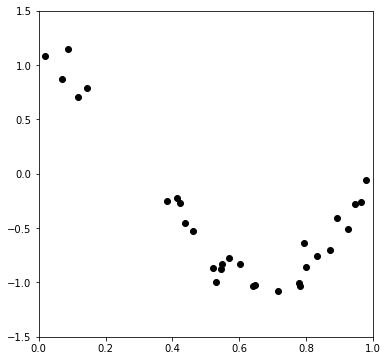

In [40]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Podziel dane na dwie grupy.

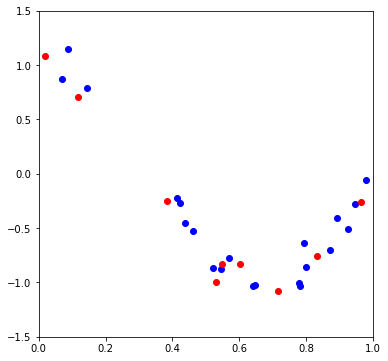

In [27]:
s=np.random.random_sample(n_samples)
s[s>0.2]=1
s[s<=0.2]=0
s
X1=X[s==1]
y1=y[s==1]
X2=X[s==0]
y2=y[s==0]

# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')
x_tr = np.linspace(0, 1, 200)
plt.show()

# Zadanie
Wykonaj regresję:
* liniową


In [28]:
model1 = LinearRegression()
model1.fit(np.vstack(X1), y1)

model2 = LinearRegression()
model2.fit(np.vstack(X2), y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

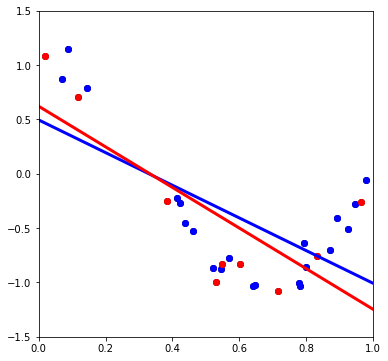

In [29]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(np.vstack(x_tr), model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(np.vstack(x_tr), model2.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.show()

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $4$


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model1 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(4), LinearRegression())
model2.fit(np.vstack(X2), y2)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

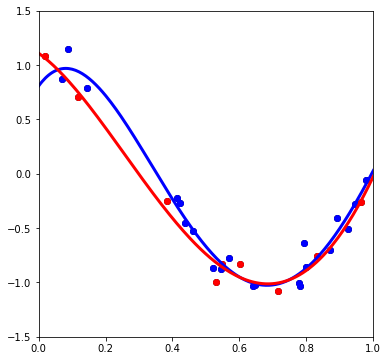

In [31]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,1.5])
plt.scatter(X, y,  color='black')
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(np.vstack(x_tr), model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(np.vstack(x_tr), model2.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.show()

# Zadanie
Wykonaj regresję:
* wielomianową stopnia $15$


In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model1 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model1.fit(np.vstack(X1), y1)

model2 = make_pipeline(PolynomialFeatures(15), LinearRegression())
model2.fit(np.vstack(X2), y2)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=15, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

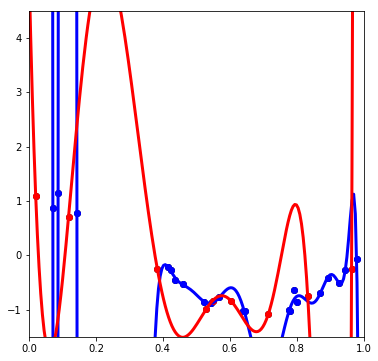

In [37]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([-1.5,4.5])
plt.scatter(X, y,  color='black')
plt.scatter(X1, y1,  color='blue')
plt.scatter(X2, y2,  color='red')

plt.plot(np.vstack(x_tr), model1.predict(np.vstack(x_tr)), color='blue',linewidth=3)
plt.plot(np.vstack(x_tr), model2.predict(np.vstack(x_tr)), color='red',linewidth=3)
plt.show()